In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULT_PATH = 'result'

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

DDQN_0.json []
990
DQN_0.json []
230
Q-Learning_0.json []
1160
SARSA_0.json []
890


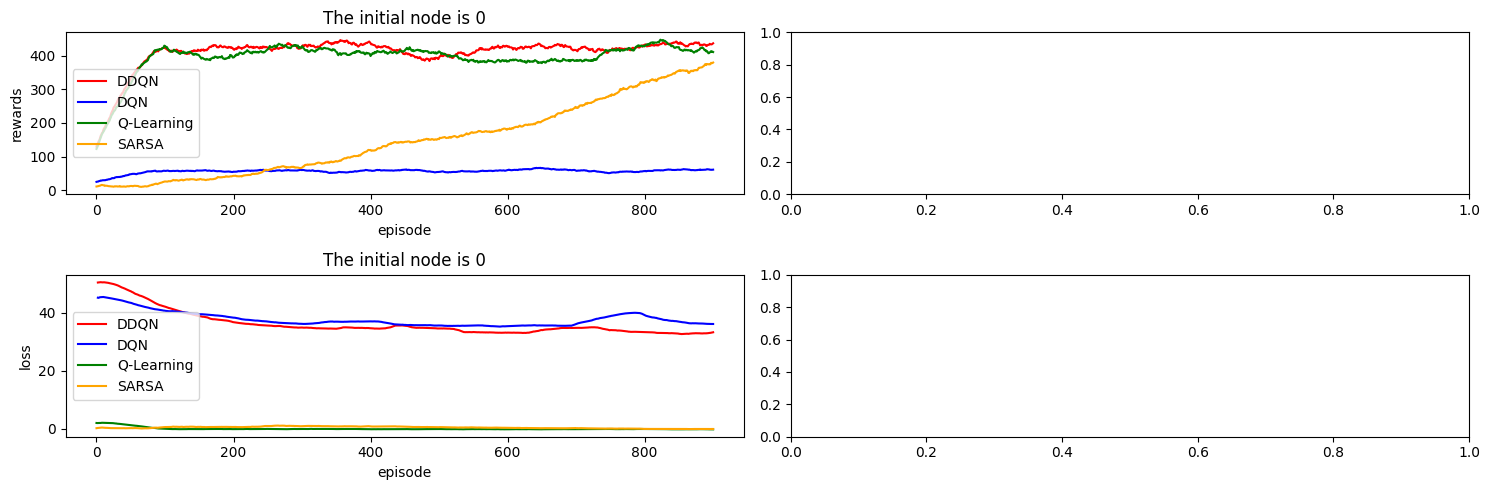

In [4]:
cmap = {
    'DQN': 'b',
    'DDQN': 'r',
    'SARSA': 'orange',
    'Q-Learning': 'g'
}

figure, ax_list = plt.subplots(2, 2, figsize=(15, 5))

for name in os.listdir(RESULT_PATH):
#     if name != 'Q-Learning_0.json': continue
    agent, start_node = name.split('.')[0].split('_')
    start_node = int(start_node)
    with open(os.path.join(RESULT_PATH, name)) as f:
        data = json.load(f)
        print(name, data['best_path'])
        print(max(data['rewards']))
        for row, ylabel in enumerate(['rewards', 'loss']):
            ax = ax_list[row, start_node]
            ax.plot(moving_average(data[ylabel], 100), color=cmap[agent], label=agent)
            ax.set_xlabel('episode')
            ax.set_ylabel(ylabel)
            ax.set_title(f'The initial node is {start_node}')
            ax.legend()
figure.tight_layout()